In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from etl.extract import extract_excel

In [31]:
data = pd.read_excel("../data/raw/uczelnie_data_set.xlsx")
data

,woj,uczelnia
0,Dolnośląskie,AKADEMIA NAUK STOSOWANYCH ANGELUSA SILESIUSA W...
1,Dolnośląskie,AKADEMIA NAUK STOSOWANYCH ANGELUSA SILESIUSA W...
2,Dolnośląskie,AKADEMIA NAUK STOSOWANYCH ANGELUSA SILESIUSA W...
3,Dolnośląskie,AKADEMIA NAUK STOSOWANYCH ANGELUSA SILESIUSA W...
4,Dolnośląskie,AKADEMIA NAUK STOSOWANYCH ANGELUSA SILESIUSA W...
...,...,...
39022,REGION MAZOWIECKI REGIONALNY,WYŻSZA SZKOŁA ADMINISTRACJI PUBLICZNEJ W OSTRO...
39023,REGION MAZOWIECKI REGIONALNY,WYŻSZA SZKOŁA ADMINISTRACJI PUBLICZNEJ W OSTRO...
39024,REGION MAZOWIECKI REGIONALNY,WYŻSZA SZKOŁA ADMINISTRACJI PUBLICZNEJ W OSTRO...
39025,REGION MAZOWIECKI REGIONALNY,WYŻSZA SZKOŁA ADMINISTRACJI PUBLICZNEJ W OSTRO...


In [32]:
from etl import transform_excel

woj_to_uni = transform_excel(data)
woj_to_uni

{'Dolnośląskie': ['AKADEMIA NAUK STOSOWANYCH ANGELUSA SILESIUSA W WAŁBRZYCHU',
  'AKADEMIA NAUK STOSOWANYCH WE WROCŁAWIU',
  'AKADEMIA WYCHOWANIA FIZYCZNEGO IM. POLSKICH OLIMPIJCZYKÓW WE WROCŁAWIU',
  'COLLEGIUM WITELONA UCZELNIA PAŃSTWOWA W LEGNICY',
  'EWANGELIKALNA WYŻSZA SZKOŁA TEOLOGICZNA WE WROCŁAWIU',
  'KARKONOSKA AKADEMIA NAUK STOSOWANYCH W JELENIEJ GÓRZE',
  'MIĘDZYNARODOWA WYŻSZA SZKOŁA LOGISTYKI I TRANSPORTU WE WROCŁAWIU',
  'NIEPUBLICZNA WYŻSZA SZKOŁA MEDYCZNA WE WROCŁAWIU',
  'PAŃSTWOWA AKADEMIA NAUK STOSOWANYCH W GŁOGOWIE',
  'POLITECHNIKA WROCŁAWSKA',
  'SZKOŁA WYŻSZA RZEMIOSŁ ARTYSTYCZNYCH I ZARZĄDZANIA WE WROCŁAWIU',
  'UCZELNIA JANA WYŻYKOWSKIEGO W POLKOWICACH',
  'UNIWERSYTET DOLNOŚLĄSKI DSW WE WROCŁAWIU',
  'UNIWERSYTET EKONOMICZNY WE WROCŁAWIU',
  'UNIWERSYTET PRZYRODNICZY WE WROCŁAWIU',
  'UNIWERSYTET WROCŁAWSKI',
  'UNIWERSYTET WSB MERITO WE WROCŁAWIU',
  'WROCŁAWSKA AKADEMIA BIZNESU W NAUKACH STOSOWANYCH',
  'WROCŁAWSKA WYŻSZA SZKOŁA INFORMATYKI STOSOWANEJ',
  

In [33]:
woj_df = pd.DataFrame(list(woj_to_uni.items()), columns=["Województwo", "Uczelnie"])
woj_df

,Województwo,Uczelnie
0,Dolnośląskie,[AKADEMIA NAUK STOSOWANYCH ANGELUSA SILESIUSA ...
1,Kujawsko-pomorskie,"[AKADEMIA JAGIELLOŃSKA W TORUNIU, AKADEMIA KUJ..."
2,Lubelskie,"[Ogółem, AKADEMIA BIALSKA IM. JANA PAWŁA II W ..."
3,Lubuskie,"[Ogółem, AKADEMIA IM. JAKUBA Z PARADYŻA W GORZ..."
4,Mazowieckie,"[Ogółem, AKADEMIA EKONOMICZNO-HUMANISTYCZNA W ..."
5,Małopolskie,"[Ogółem, AKADEMIA GÓRNICZO-HUTNICZA IM. STANIS..."
6,Opolskie,"[Ogółem, AKADEMIA NAUK STOSOWANYCH - WYŻSZA SZ..."
7,Podkarpackie,"[Ogółem, PAŃSTWOWA AKADEMIA NAUK STOSOWANYCH I..."
8,Podlaskie,"[Ogółem, AKADEMIA ŁOMŻYŃSKA, AKADEMIA PODLASKA..."
9,Pomorskie,"[Ogółem, AKADEMIA ATENEUM W GDAŃSKU, AKADEMIA ..."


<Figure size 1000x600 with 0 Axes>

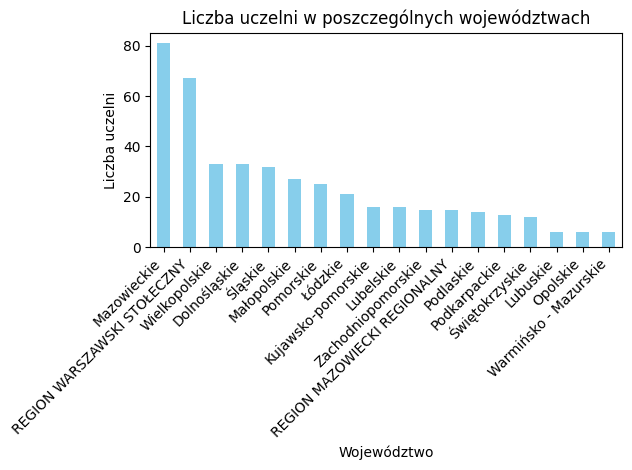

In [34]:
woj_df["Liczba uczelni"] = woj_df["Uczelnie"].apply(len)
plt.figure(figsize=(10, 6))
woj_df.sort_values("Liczba uczelni", ascending=False).plot(kind="bar", x="Województwo", y="Liczba uczelni",
                                                           color="skyblue", legend=False)

plt.title("Liczba uczelni w poszczególnych województwach")
plt.xlabel("Województwo")
plt.ylabel("Liczba uczelni")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

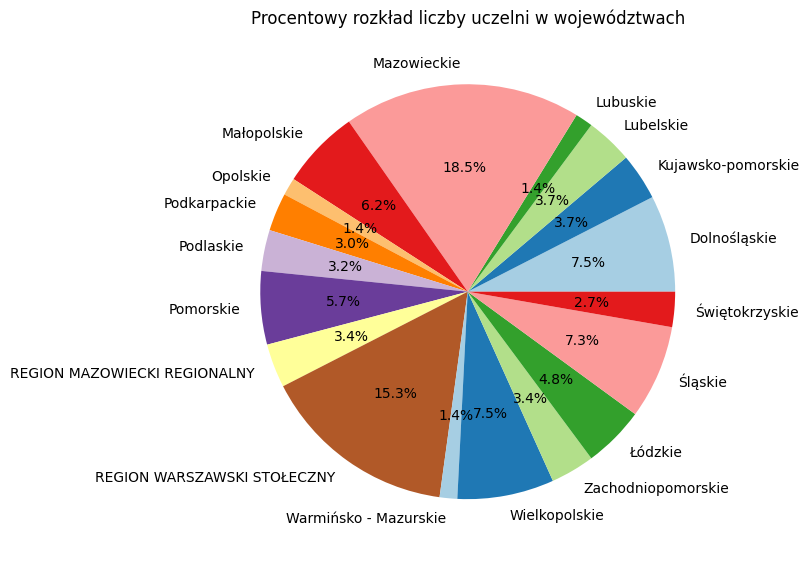

In [35]:
plt.figure(figsize=(8, 8))
woj_df.set_index("Województwo")["Liczba uczelni"].plot(kind="pie", autopct='%1.1f%%', colors=plt.cm.Paired.colors)

plt.title("Procentowy rozkład liczby uczelni w województwach")
plt.ylabel("")

plt.tight_layout()
plt.show()